::: {.callout-note appearance="simple"}

## About this series

This is an article from the series about statistics (and probability theory). The motivation behind this series is to retain knowledge while taking courses, reading books and articles. I write articles about something that I missed before, found interesting or possibly useful to me in the future. These articles do not constitute a course, they are just a collection of my personal study notes or summaries on different topics related to statistics.
:::

## Outcomes and events

In *statistics*, **observational units** are people, things, systems, etc., for which data is observed. **Variables** are characteristics or quantities that represent attributes of observational units. For example, if a hive of bees is an observational unit, then variables can include the type of bees, the age of the hive, the number of hive frames, the defensiveness of the bees, etc. 

In *probability theory*, an **outcome** is the result of some random situation, experiment or phenomenon. It can be a coin flip, a soccer match, a new neighbour, or the weather tomorrow. **The sample space** is the collection of all possible outcomes of a random phenomenon. But in practice, it is often infeasible or even impossible to list all possible outcomes, so instead, we work with events. **An event** is a specific combination of outcomes or a subset of the sample space that we are interested in. For example, “Team A wins the match with team B”, “The temperature is exactly 20°C”, “My new neighbour is taller than me, has any number of kids and one cat” or “Getting 5 tails out of 7 coin flips and the first flip results in tail”. 

Because events are sets, we can use basic set operations: unions (or), intersections (and) and complements (not). Because the probability of the union of all outcomes in sample space is always equal to 1, if we know the probability of some event, we can easily find its complementary event without calculating the probabilities of all remaining outcomes. 

In probability theory, outcomes are somewhat similar to observational units in statistics in that sense that typically they both aren’t defined strictly. More often we work with events instead of outcomes and variables instead of observational units. 


## Random variables

**Random variable**, also known as **stochastic variable**, describes the numerical outcome of a random experiment or phenomenon. It encompasses all possible outcomes in some form. Random variables can be divided into two categories:

* **discrete** random variable - can take on a finite number of distinct values. Example: the number of kids in a family.
* **continuous** random variable - can take on an infinite number of possible values (from an interval). Example: the weight of a potato.

## Probability distribution 

**Probability distribution** is a mathematical function that describes the likelihood of different outcomes or events. There are several such functions:

* **PDF**: ***Probability density function*** - describes the probability distribution of a continuous random variable. 
* **PMF**: ***Probability mass function*** - describes the probability distribution of a discrete random variable. 
* **CDF**: ***Cumulative distribution function*** - gives the cumulative probability distribution for a random variable (discrete or continuous). the CDF provides the probability that a random variable is less than or equal to a specific value. It is defined for both discrete and continuous random variables. 


### Discrete distributions

A discrete distribution models discrete random variables, i.e. variables with a countable number of possible outcomes.

* Binomial. The binomial distribution describes the number of successes in a fixed number of trials with two possible outcomes. For example, the number of tails in 100 coin tosses. 
* Bernoulli. Models a single trial with two possible outcomes: success or failure. It is often used to represent situations where there is a binary event, and we want to calculate the probability of observing a specific outcome. For example, the probability of drawing a red card from a deck.
* Geometric. Models the number of trials needed to achieve the first success in a sequence of independent Bernoulli trials, where each trial has two possible outcomes (success or failure) and the probability of success remains the same for each trial. The geometric distribution is commonly used in various applications, such as modelling the number of attempts until an event occurs, analyzing waiting times, and estimating probabilities in scenarios involving repeated trials with a fixed probability of success. 
* Poisson. Models the number of events occurring in a fixed interval of time or space, given the average rate of occurrence. It is used when events happen randomly and independently over a continuous interval. Unlike binomial distribution, we don’t have any successes or failures, we only model how many events occurred. The Poisson distribution is often used in situations where events occur with a low probability but at a high rate, such as modelling the number of phone calls received at a call centre in a given time period, the number of customers arriving at a store per hour, or the number of accidents on a particular stretch of road in a day.


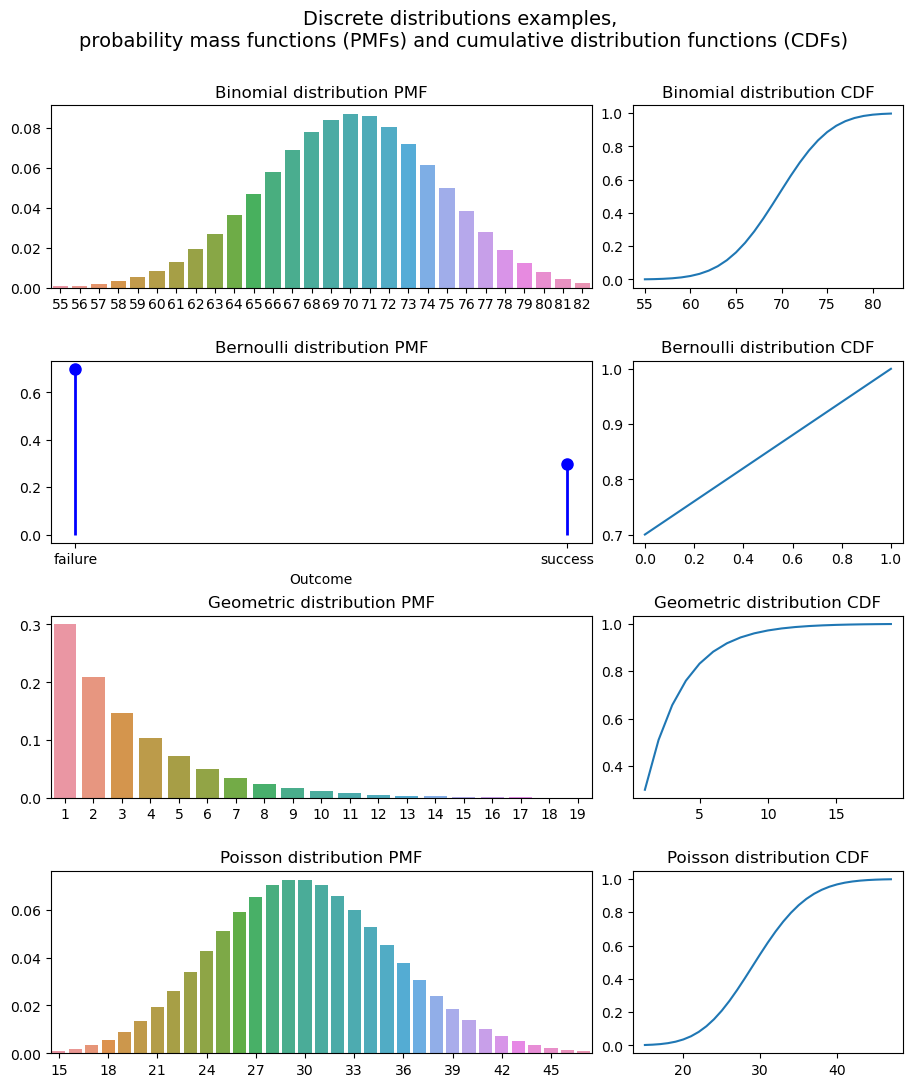

In [49]:
import numpy as np
import seaborn as sns
from scipy.stats import binom, geom, bernoulli, poisson
import matplotlib.pyplot as plt

fig, axs = plt.subplots(
    4, 2, figsize=(11, 12), num='discrete', 
    gridspec_kw={'width_ratios': [2, 1], 'wspace':0.1, 'hspace':0.4}
)
fig.suptitle(
    'Discrete distributions examples, \nprobability mass functions (PMFs) and \
    cumulative distribution functions (CDFs)', 
    fontsize=14
)
fig.subplots_adjust(top=0.9)

# Binomial
#ax = axs[0,0]
p = 0.7  # the probability of success
n = 100  # the number of trials
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p)).astype(int)
y = binom.pmf(x, n, p)
y2 = binom.cdf(x, n, p)
sns.barplot(ax=axs[0,0], x=x, y=y).set_title('Binomial distribution PMF')
sns.lineplot(ax=axs[0,1], x=x, y=y2).set_title('Binomial distribution CDF')
ax.set_xticks(axs[0,0].get_xticks()[::3])

# Bernoulli
ax = axs[1,0]
p = 0.3  # the probability of success (e.g. obserivng a specific outcome)
x = [0., 1.]  # 0 is failure and 1 is success
x_plot = ['failure', 'success']  # just to hve a nicer plot
y = bernoulli.pmf(x, p)
y2 = bernoulli.cdf(x, p)
ax.plot(x, y, 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x_plot, 0, y, colors='b', linestyles='-', lw=2, label='frozen pmf')
ax.set_title('Bernoulli distribution PMF')
ax.set_xlabel('Outcome')
sns.lineplot(ax=axs[1,1], x=x, y=y2).set_title('Bernoulli distribution CDF')

# Geometric
x = np.arange(geom.ppf(0.001, p), geom.ppf(0.999, p)).astype(int)
y = geom.pmf(x, p)
y2 = geom.cdf(x, p)
sns.barplot(ax=axs[2,0], x=x, y=y).set_title('Geometric distribution PMF')
sns.lineplot(ax=axs[2,1], x=x, y=y2).set_title('Geometric distribution CDF')

# Poisson
ax = axs[3,0]
mu = 30  # the average rate of events occurring in the given interval
x = np.arange(poisson.ppf(0.001, mu), poisson.ppf(0.999, mu)).astype(int)
y = poisson.pmf(x, mu)
y2 = poisson.cdf(x, mu)
sns.barplot(ax=ax, x=x, y=y).set_title('Poisson distribution PMF')
ax.set_xticks(ax.get_xticks()[::3])
sns.lineplot(ax=axs[3,1], x=x, y=y2).set_title('Poisson distribution CDF')

plt.show('discrete')
fig.clear()
plt.close(fig)

### Continuous distributions

Most popular examples of continuous distributions are:
    
* Uniform. All values within a specified range have equal probability. It is often used when there is no preference or bias towards any particular value in the range.
* Normal or Gaussian. Characterized by a bell-shaped curve. It is used to model many natural phenomena, such as heights, weights, and measurement errors.
* Exponential. This distribution models the time between events in a Poisson process, where events occur randomly and independently at a constant average rate.
* Gamma. The gamma distribution is a versatile distribution that is often used to model waiting times, durations, and survival times. It is a continuous analogue of the negative binomial distribution.

Note that the exponential distribution is a specific case of the gamma distribution with a shape parameter of 1, the gamma distribution offers more flexibility in modelling various scenarios by allowing different shapes and scales. The choice between these distributions depends on the specific characteristics and requirements of the data being analyzed.


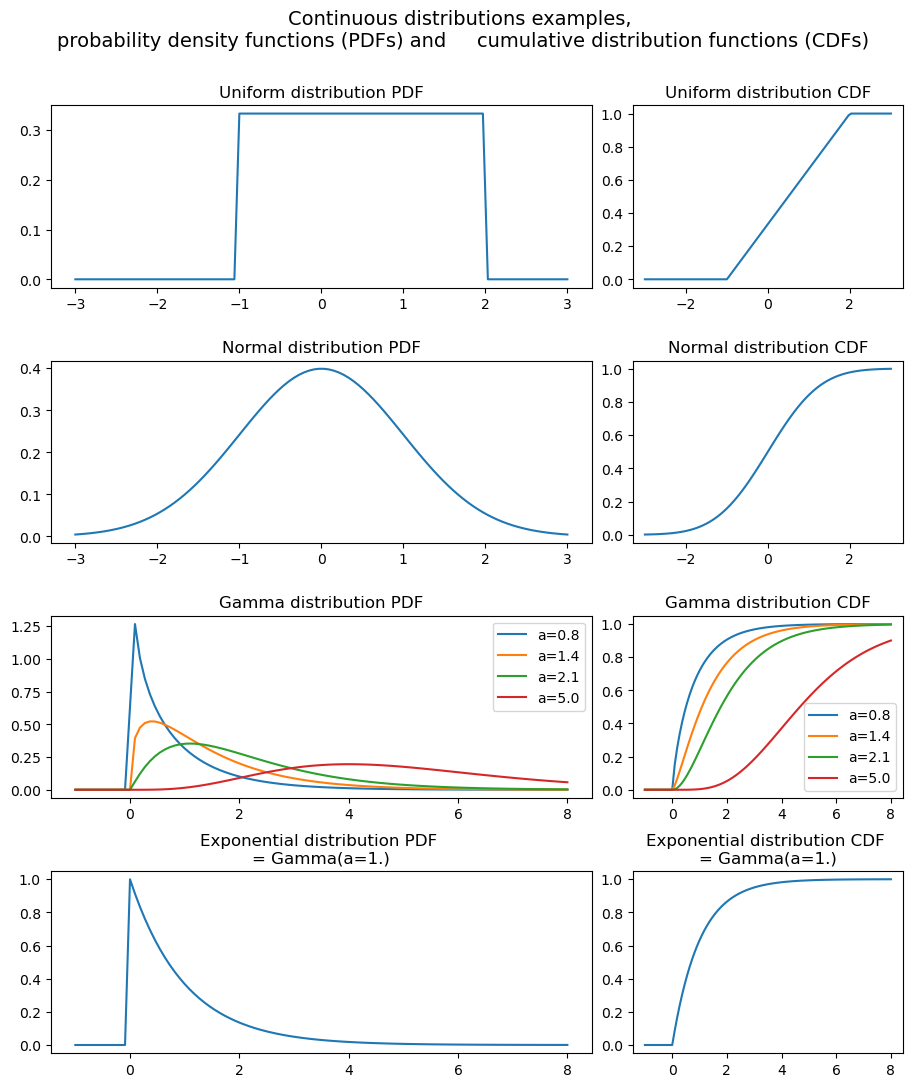

In [69]:
from scipy.stats import uniform, norm, expon, gamma

fig, axs = plt.subplots(
    4, 2, figsize=(11, 12), num='continuous', 
    gridspec_kw={'width_ratios': [2, 1], 'wspace':0.1, 'hspace':0.4}
)
fig.suptitle(
    'Continuous distributions examples, \nprobability density functions (PDFs) and \
    cumulative distribution functions (CDFs)', 
    fontsize=14
)
fig.subplots_adjust(top=0.9)

x = np.linspace(-3, 3, 100)

# Uniform
y = uniform.pdf(x, loc=-1, scale=3)  # uniform probability on [loc, loc+scale]
y2 = uniform.cdf(x, loc=-1, scale=3)
sns.lineplot(ax=axs[0,0], x=x, y=y, legend=True).set_title('Uniform distribution PDF')
sns.lineplot(ax=axs[0,1], x=x, y=y2, legend=True).set_title('Uniform distribution CDF')

# Normal
y = norm.pdf(x)
y2 = norm.cdf(x)
sns.lineplot(ax=axs[1,0], x=x, y=y, legend=True).set_title('Normal distribution PDF')
sns.lineplot(ax=axs[1,1], x=x, y=y2, legend=True).set_title('Normal distribution CDF')

x = np.linspace(-1, 8, 100)

# Gamma
for a in (0.8, 1.4, 2.1, 5.):
    y = gamma.pdf(x, a=a)
    y2 = gamma.cdf(x, a=a)
    sns.lineplot(ax=axs[2,0], x=x, y=y, label=f'a={a}').set_title('Gamma distribution PDF')
    sns.lineplot(ax=axs[2,1], x=x, y=y2, label=f'a={a}').set_title('Gamma distribution CDF')

# Exponential
y = expon.pdf(x)
y2 = expon.cdf(x)
sns.lineplot(ax=axs[3,0], x=x, y=y, legend=True).set_title('Exponential distribution PDF \n= Gamma(a=1.)')
sns.lineplot(ax=axs[3,1], x=x, y=y2, legend=True).set_title('Exponential distribution CDF \n= Gamma(a=1.)')

plt.show('continuous')
fig.clear()
plt.close(fig)

### Practical notes: KDE vs PDF

Kernel Density Estimation is a non-parametric statistical technique used to estimate the probability density function (PDF) of a continuous random variable based on a set of observed data points. The goal of KDE is to create a smooth estimate of the underlying distribution of the data.

In KDE, a kernel function is placed at each data point, and these kernels are then combined to create a smooth curve that approximates the PDF. The kernel function is usually a smooth and symmetric function, such as the Gaussian (normal) distribution.

Below is an example from (sci-learn tutorial)[https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation]

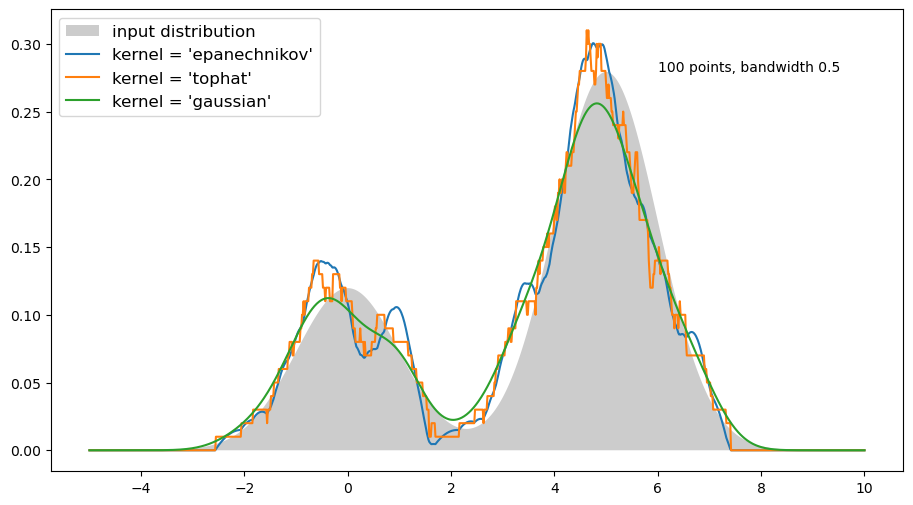

In [28]:
from sklearn.neighbors import KernelDensity

N = 100
kernel3 = 'epanechnikov'
bandwidth = 0.5

x = np.linspace(-5, 10, 1000)
x_sample = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

fig, ax = plt.subplots(figsize=(11, 6), num='kde')
true_density = (0.3 * norm(0, 1).pdf(x) + 0.7 * norm(5, 1).pdf(x))
ax.fill(x[:], true_density, fc='black', alpha=0.2, label='input distribution')

for kernel in [kernel3, 'tophat', 'gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(x_sample)
    log_dens = kde.score_samples(x[:, np.newaxis])
    ax.plot(x, np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

#ax.set_xlim(-4, 9)
#ax.set_ylim(-0.02, 0.4)

ax.text(6, 0.28, f'{N} points, bandwidth {bandwidth}')
ax.legend(loc='upper left', prop={'size': 12})

plt.show('kde')
fig.clear()
plt.close(fig)

In [68]:
# TODO: add parameter sliders for interactivity
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

from sklearn.neighbors import KernelDensity

N = 100
bandwidth = 0.5

x = np.linspace(-5, 10, 1000)
x_sample = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
true_density = (0.3 * norm(0, 1).pdf(x) + 0.7 * norm(5, 1).pdf(x))

fig = make_subplots(specs=[[{"secondary_y": False}]])
fig.add_trace(
    go.Scatter(x=x[:], y=true_density, fill='tozeroy', name='input distribution', line=dict(color='gray'))
)

N_steps = np.arange(20, 1000, 60)
bandwidth_steps = (0.05, 0.1, 0.5, 1, 3)
L = len(N_steps) + len(bandwidth_steps)


for kernel in ['tophat', 'gaussian', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(x_sample)
    log_dens = kde.score_samples(x[:, np.newaxis])
    for n in N_steps:
        for b in bandwidth_steps: 
            fig.add_trace(go.Scatter(visible=False, x=x, y=np.exp(log_dens), name=f'kernel {kernel}'))
    
fig['layout'].update(
    height = 600, width = 1100, 
    title = f'KDE vs PDF, {N} points, bandwidth {bandwidth}', 
    font=dict(size=16, color='black')
)

#fig.show()
#fig.data = []
#fig.layout = {}
;

''

KDE is a neighbor-based approach to density estimation. Another popular approach is using mixture models such as Gaussian Mixtures. 

## Probability spaces

TODO